In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("/home/strongich/PythonProj/UNI/DIPLOMA")
from src.create_plots import analyze_series

# Explanation of Option Trading Dataset Columns

1. **UnderlyingSymbol:**
   - The symbol of the underlying asset (e.g., stock, index) on which the option is based.

2. **UnderlyingPrice:**
   - The current market price of the underlying asset.

3. **Flags:**
   - Flags indicating various characteristics or conditions related to the option. This could include information about dividends, special events, etc.

4. **OptionSymbol:**
   - The symbol that uniquely identifies the option contract.

5. **Type:**
   - The type of option, either 'Call' or 'Put', indicating whether the option gives the right to buy (call) or sell (put) the underlying asset.

6. **Expiration:**
   - The expiration date of the option contract, indicating when the option expires and can no longer be exercised.

7. **DataDate:**
   - The date on which the data is recorded.

8. **Strike:**
   - The strike price is the price at which the option holder can buy (for a call option) or sell (for a put option) the underlying asset.

9. **Last:**
   - The last traded price of the option.

10. **Bid:**
    - The highest price a buyer is willing to pay for the option.

11. **Ask:**
    - The lowest price a seller is willing to accept for the option.

12. **Volume:**
    - The total number of contracts traded during a specific period.

13. **OpenInterest:**
    - The total number of outstanding (not yet closed or exercised) contracts for a particular option.

14. **T1OpenInterest:**
    - A related metric for open interest, possibly representing changes or updates in open interest.

15. **IVMean:**
    - Implied volatility mean, a measure of the market's expectation of future volatility of the underlying asset, derived from the option's price.

16. **IVBid:**
    - Implied volatility bid, the highest price a buyer is willing to pay for the implied volatility.

17. **IVAsk:**
    - Implied volatility ask, the lowest price a seller is willing to accept for the implied volatility.

18. **Delta:**
    - Delta measures the sensitivity of the option's price to changes in the price of the underlying asset.

19. **Gamma:**
    - Gamma represents the rate of change of an option's delta in response to a one-point movement in the underlying asset's price.

20. **Theta:**
    - Theta, also known as time decay, measures the sensitivity of the option's price to the passage of time.

21. **Vega:**
    - Vega measures the sensitivity of the option's price to changes in implied volatility.

22. **AKA:**
    - Possibly an alias or additional identifier for the option.


In [5]:
data = pd.read_csv("L2_options_20190830.csv")
print(data.shape)
data.head()

(958448, 20)


,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,OptionExt,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,AKA
0,A,71.11,*,A190920C00055000,NaN,call,09/20/2019,08/30/2019,55.0,0.00,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,A190920C00055000
1,A,71.11,*,A190920P00055000,NaN,put,09/20/2019,08/30/2019,55.0,0.04,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,A190920P00055000
2,A,71.11,*,A190920C00060000,NaN,call,09/20/2019,08/30/2019,60.0,12.00,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,A190920C00060000
3,A,71.11,*,A190920P00060000,NaN,put,09/20/2019,08/30/2019,60.0,0.18,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,A190920P00060000
4,A,71.11,*,A190920C00062500,NaN,call,09/20/2019,08/30/2019,62.5,9.73,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659,A190920C00062500


In [3]:
# flags seems to be useless
data.columns

Index(['UnderlyingSymbol', 'UnderlyingPrice', 'Exchange', 'OptionSymbol',
       'OptionExt', 'Type', 'Expiration', 'DataDate', 'Strike', 'Last', 'Bid',
       'Ask', 'Volume', 'OpenInterest', 'IV', 'Delta', 'Gamma', 'Theta',
       'Vega', 'AKA'],
      dtype='object')

In [4]:
data = data.query("UnderlyingPrice >= 40 and UnderlyingPrice <= 200")

In [5]:
data.head()

,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,OptionExt,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,AKA
0,A,71.11,*,A190920C00055000,NaN,call,09/20/2019,08/30/2019,55.0,0.00,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,A190920C00055000
1,A,71.11,*,A190920P00055000,NaN,put,09/20/2019,08/30/2019,55.0,0.04,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,A190920P00055000
2,A,71.11,*,A190920C00060000,NaN,call,09/20/2019,08/30/2019,60.0,12.00,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,A190920C00060000
3,A,71.11,*,A190920P00060000,NaN,put,09/20/2019,08/30/2019,60.0,0.18,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,A190920P00060000
4,A,71.11,*,A190920C00062500,NaN,call,09/20/2019,08/30/2019,62.5,9.73,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659,A190920C00062500


In [6]:
data = data.rename(columns={" DataDate":"DataDate"})

In [7]:
data.DataDate.value_counts()

DataDate
08/30/2019    446434
Name: count, dtype: int64

In [8]:
data.columns

Index(['UnderlyingSymbol', 'UnderlyingPrice', 'Exchange', 'OptionSymbol',
       'OptionExt', 'Type', 'Expiration', 'DataDate', 'Strike', 'Last', 'Bid',
       'Ask', 'Volume', 'OpenInterest', 'IV', 'Delta', 'Gamma', 'Theta',
       'Vega', 'AKA'],
      dtype='object')

In [9]:
# Useless columns - Flags, OptionSymbol, DataDate, AKA

In [10]:
data = data.drop(
    [
        "Exchange",
        "OptionSymbol",
        "OptionExt",
        "AKA",
        "Last",
        # "Volume",
        # "OpenInterest",
        # "Delta",
        # "Gamma",
        # "Theta",
        # "Vega",
    ],
    axis=1,
)
data.head()

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega
0,A,71.11,call,09/20/2019,08/30/2019,55.0,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015
1,A,71.11,put,09/20/2019,08/30/2019,55.0,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253
2,A,71.11,call,09/20/2019,08/30/2019,60.0,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636
3,A,71.11,put,09/20/2019,08/30/2019,60.0,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604
4,A,71.11,call,09/20/2019,08/30/2019,62.5,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659


In [11]:
data.Expiration = pd.to_datetime(data.Expiration)
data.DataDate = pd.to_datetime(data.DataDate)

In [12]:
data.Expiration.describe()

count                           446434
mean     2019-12-15 14:28:17.709403392
min                2019-08-30 00:00:00
25%                2019-09-20 00:00:00
50%                2019-10-18 00:00:00
75%                2020-01-17 00:00:00
max                2021-12-17 00:00:00
Name: Expiration, dtype: object

In [13]:
data = data.rename({"UnderlyingPrice":"CurrentPrice","Strike":"StrikePrice"})

In [14]:
data.head()

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega
0,A,71.11,call,2019-09-20,2019-08-30,55.0,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015
1,A,71.11,put,2019-09-20,2019-08-30,55.0,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253
2,A,71.11,call,2019-09-20,2019-08-30,60.0,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636
3,A,71.11,put,2019-09-20,2019-08-30,60.0,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604
4,A,71.11,call,2019-09-20,2019-08-30,62.5,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659


In [15]:
data["Time"] = data.Expiration - data.DataDate
data.Time = data.Time.dt.days

In [16]:
data.head()

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Time
0,A,71.11,call,2019-09-20,2019-08-30,55.0,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,21
1,A,71.11,put,2019-09-20,2019-08-30,55.0,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,21
2,A,71.11,call,2019-09-20,2019-08-30,60.0,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,21
3,A,71.11,put,2019-09-20,2019-08-30,60.0,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,21
4,A,71.11,call,2019-09-20,2019-08-30,62.5,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659,21


In [17]:
data["TargetPrice"] = ((data.Bid + data.Ask)/2).round(2)

In [18]:
print(data.shape)
data.head()

(446434, 17)


,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Time,TargetPrice
0,A,71.11,call,2019-09-20,2019-08-30,55.0,14.3,17.85,0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,21,16.08
1,A,71.11,put,2019-09-20,2019-08-30,55.0,0.0,0.05,0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,21,0.02
2,A,71.11,call,2019-09-20,2019-08-30,60.0,10.8,11.95,0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,21,11.38
3,A,71.11,put,2019-09-20,2019-08-30,60.0,0.0,0.07,0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,21,0.04
4,A,71.11,call,2019-09-20,2019-08-30,62.5,6.9,10.10,0,9,0.2693,0.9813,0.0101,-3.2537,0.7659,21,8.50


In [19]:
data = data.drop(
    ["UnderlyingSymbol", "Volume", "Bid", "Ask", "Expiration", "DataDate"], axis=1
)
data.head()

,UnderlyingPrice,Type,Strike,OpenInterest,IV,Delta,Gamma,Theta,Vega,Time,TargetPrice
0,71.11,call,55.0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,21,16.08
1,71.11,put,55.0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,21,0.02
2,71.11,call,60.0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,21,11.38
3,71.11,put,60.0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,21,0.04
4,71.11,call,62.5,9,0.2693,0.9813,0.0101,-3.2537,0.7659,21,8.50


In [20]:
data.OpenInterest.describe()

count    446434.000000
mean        255.832432
std        2460.083602
min           0.000000
25%           0.000000
50%           0.000000
75%          31.000000
max      263086.000000
Name: OpenInterest, dtype: float64

In [21]:
data[data.Type == "call"].to_csv("../train_data/call_df.csv")
data[data.Type == "put"].to_csv("../train_data/put_df.csv")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("/home/strongich/PythonProj/UNI/DIPLOMA")
from src.create_plots import analyze_series

In [17]:
df_call = pd.read_csv("../train_data/call_df.csv", index_col=0)
df_call

,UnderlyingPrice,Type,Strike,OpenInterest,IV,Delta,Gamma,Theta,Vega,Time,TargetPrice
0,71.11,call,55.0,0,0.2693,1.0000,0.0000,-1.2654,0.0015,21,16.08
2,71.11,call,60.0,3,0.2693,0.9968,0.0022,-1.7664,0.1636,21,11.38
4,71.11,call,62.5,9,0.2693,0.9813,0.0101,-3.2537,0.7659,21,8.50
6,71.11,call,65.0,16,0.2693,0.9286,0.0302,-6.9022,2.2884,21,6.98
8,71.11,call,67.5,44,0.2430,0.8313,0.0617,-10.4813,4.2260,21,4.10
...,...,...,...,...,...,...,...,...,...,...,...
957920,126.42,call,170.0,16,0.1966,0.1514,0.0080,-2.8751,34.8338,504,2.08
957922,126.42,call,175.0,110,0.1958,0.1227,0.0070,-2.4612,30.1679,504,1.60
957924,126.42,call,180.0,152,0.1959,0.0997,0.0060,-2.1073,25.9963,504,1.25
957926,126.42,call,185.0,62,0.1934,0.0773,0.0050,-1.7114,21.5039,504,0.92


Describe:
count    223217.000000
mean         10.841644
std          15.903200
min           0.000000
25%           0.600000
50%           4.450000
75%          14.320000
max         180.720000
Name: TargetPrice, dtype: float64

Skewness: 2.6446205203721784
Kurtosis: 9.551618732681792


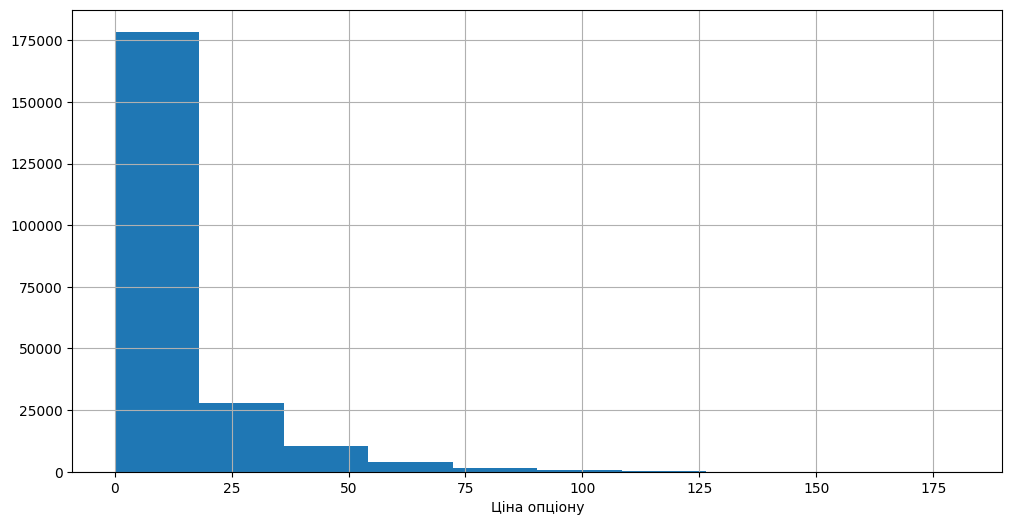

In [18]:
analyze_series(df_call.TargetPrice)

Describe:
count    223217.000000
mean         92.114251
std          41.487900
min          40.000000
25%          55.760000
50%          83.730000
75%         121.640000
max         199.680000
Name: UnderlyingPrice, dtype: float64

Skewness: 0.6508699354103957
Kurtosis: -0.6119209605462417


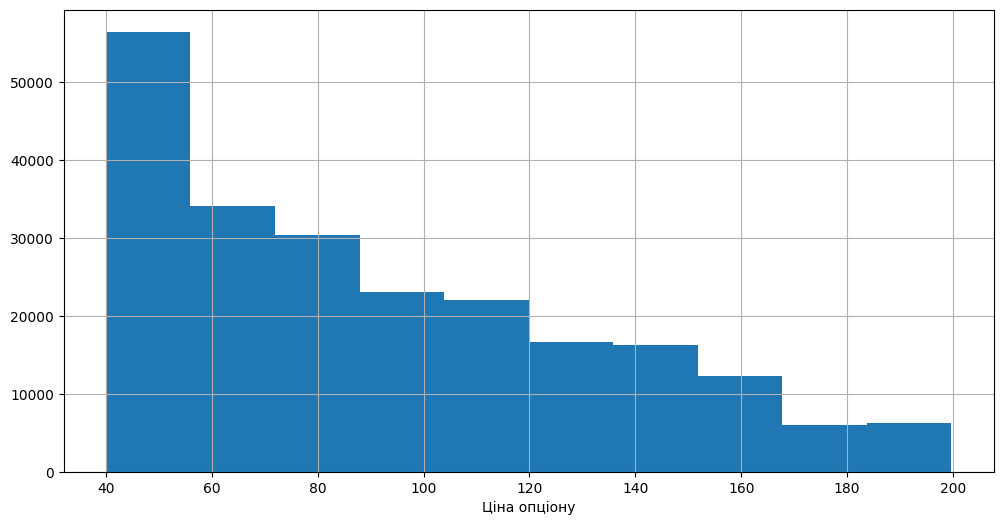

In [19]:
analyze_series(df_call.UnderlyingPrice)

In [20]:
df_put = pd.read_csv("../train_data/put_df.csv", index_col=0)
df_put

,UnderlyingPrice,Type,Strike,OpenInterest,IV,Delta,Gamma,Theta,Vega,Time,TargetPrice
1,71.11,put,55.0,22,0.3314,-0.0004,0.0003,-0.0747,0.0253,21,0.02
3,71.11,put,60.0,118,0.3314,-0.0130,0.0060,-1.6451,0.5604,21,0.04
5,71.11,put,62.5,2026,0.3314,-0.0441,0.0168,-4.5773,1.5638,21,0.11
7,71.11,put,65.0,443,0.2918,-0.0873,0.0324,-6.8317,2.6647,21,0.20
9,71.11,put,67.5,165,0.2675,-0.1902,0.0605,-10.6215,4.5580,21,0.48
...,...,...,...,...,...,...,...,...,...,...,...
957921,126.42,put,170.0,0,0.2820,-0.7367,0.0078,-1.8061,48.4671,504,44.00
957923,126.42,put,175.0,0,0.2887,-0.7569,0.0073,-1.5562,46.4784,504,48.55
957925,126.42,put,180.0,0,0.3087,-0.7599,0.0068,-1.7321,46.1576,504,53.60
957927,126.42,put,185.0,0,0.3244,-0.7660,0.0064,-1.7885,45.5091,504,58.50


Describe:
count    223217.000000
mean         10.852526
std          20.211609
min           0.000000
25%           0.600000
50%           3.500000
75%          12.550000
max         487.000000
Name: TargetPrice, dtype: float64

Skewness: 5.79969448555432
Kurtosis: 64.06732661206657


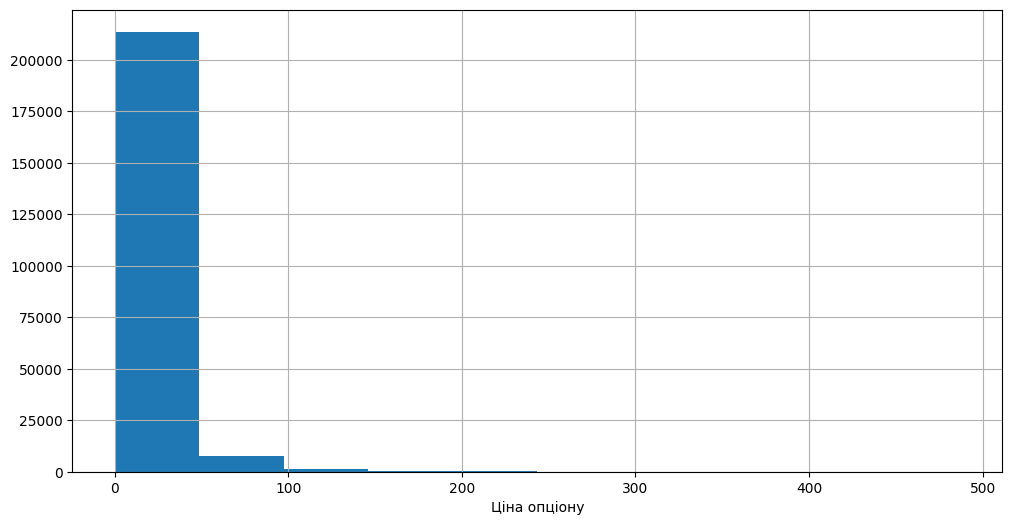

In [21]:

analyze_series(df_put.TargetPrice)

Describe:
count    223217.000000
mean         92.114251
std          41.487900
min          40.000000
25%          55.760000
50%          83.730000
75%         121.640000
max         199.680000
Name: UnderlyingPrice, dtype: float64

Skewness: 0.6508699354103957
Kurtosis: -0.6119209605462417


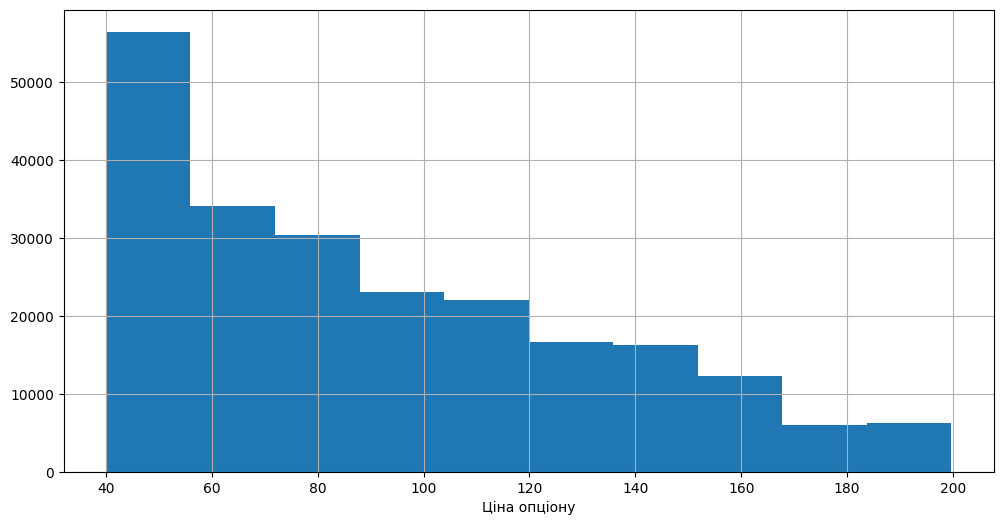

In [23]:
analyze_series(df_put.iloc[:, 0])

[risk-free](https://www.kroll.com/en/insights/publications/valuation/us-normalized-risk-free-effective-september-30-2019)